In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv("/content/Farmtheory Intern Test (1) - Excercise 1 Data Table.csv")

In [3]:
data1.head()

,Customer name,SKU Id,SKU,SP,QUANTITY
0,Emily Johnson,CAT108,Apple,97.0,2.0
1,Emily Johnson,CAT15,Banana,79.0,0.5
2,Emily Johnson,CAT35,Carrot,112.0,3.0
3,Emily Johnson,CAT37,Orange,112.0,3.0
4,Emily Johnson,CAT27,Tomato,80.0,3.0


In [12]:
#calculate the average selling price for each sku using the data provided in the sheet " Data_table"
Avg_SP=data1.groupby('SKU')['SP'].mean()
Avg_SP

,SP
SKU,
Ackee,40.600000
Apple,98.150000
Apricot,55.456667
Artichoke,39.085106
Asparagus,69.508475
...,...
White Currant,80.736842
Yardlong Bean,58.142857
Yuca,53.800000


In [17]:
data_sku=pd.read_csv("/content/SKU - Sheet1.csv")
data_sku.rename(columns={'SKU\'s':'SKU'},inplace=True)
data_sku.head()

,SKU,BP (Buying Price),SP (Selling Price),Volume
0,Orange,67,NaN,383
1,Tomato,55,NaN,183
2,Potato,30,NaN,423
3,Pineapple,20,NaN,758
4,Grapes,10,NaN,776


In [34]:

# Join the two tables on SKU
merged_data = pd.merge(data_sku, Avg_SP, on="SKU", how='left')
merged_data.drop('SP (Selling Price)',axis=1,inplace=True)
merged_data.rename(columns={'BP (Buying Price)':'BP'},inplace=True)
# Print the merged table
print(merged_data)

            SKU  BP  Volume          SP
0        Orange  67     383  107.350000
1        Tomato  55     183   79.089286
2        Potato  30     423   41.483667
3     Pineapple  20     758   24.581818
4        Grapes  10     776   32.202247
5       Spinach  33     306   46.977500
6    Strawberry  90     144   82.564103
7      Cucumber  34     107   36.373953
8         Mango  21      59   63.397590
9    Watermelon  33      68   67.487805
10     Broccoli  30     935   32.277049
11         Kiwi  11     550   22.369767
12        Lemon  20     970   25.914062
13      Avocado  10     254   29.481707
14  Cauliflower  14     305   22.614865
15         Pear  64     558   83.342857
16    Blueberry  99     929  112.660000
17  Bell Pepper  65     650   67.000000


In [36]:
#Calculate the gross margin  for each of the sku . SKU Gross margin is given by : ( 1- bp/sp)
merged_data['Gross']=1-merged_data['BP']/merged_data['SP']
merged_data

,SKU,BP,Volume,SP,Gross
0,Orange,67,383,107.350000,0.375873
1,Tomato,55,183,79.089286,0.304583
2,Potato,30,423,41.483667,0.276824
3,Pineapple,20,758,24.581818,0.186391
4,Grapes,10,776,32.202247,0.689463
5,Spinach,33,306,46.977500,0.297536
6,Strawberry,90,144,82.564103,-0.090062
7,Cucumber,34,107,36.373953,0.065265
8,Mango,21,59,63.397590,0.668757
9,Watermelon,33,68,67.487805,0.511023


In [39]:
sup_data=pd.read_csv("/content/Supplier Table - Sheet2 (1).csv")
sup_data.head()

,sku,supplier
0,Pear,Sprout & Harvest Farm
1,Pineapple,Sun-Kissed Produce
2,Watermelon,Fresh From the Field
3,Bell Pepper,Valley's Bounty
4,Blueberry,Vibrant Veggies


In [43]:
sup_data.rename(columns={'sku':'SKU'},inplace=True)
sup_data.head()

,SKU,supplier
0,Pear,Sprout & Harvest Farm
1,Pineapple,Sun-Kissed Produce
2,Watermelon,Fresh From the Field
3,Bell Pepper,Valley's Bounty
4,Blueberry,Vibrant Veggies


In [52]:
# Map the respective Supplier names in front of SKU's
final_merged_data = pd.merge(merged_data, sup_data, left_on='SKU', right_on='SKU', how='left')
result = final_merged_data[['SKU', 'supplier', 'Gross']]
result.dropna()

,SKU,supplier,Gross
3,Pineapple,Sun-Kissed Produce,0.186391
4,Grapes,Root to Table Farms,0.689463
5,Spinach,Vibrant Veggies,0.297536
6,Strawberry,Sun-Kissed Produce,-0.090062
7,Strawberry,Sun-Kissed Produce,-0.090062
10,Watermelon,Fresh From the Field,0.511023
14,Avocado,Fresh From the Field,0.660807
15,Avocado,Fresh From the Field,0.660807
16,Cauliflower,Sprout & Harvest Farm,0.380938
17,Pear,Sprout & Harvest Farm,0.232088


In [61]:
# give the list of all of the sku's whose bp is greater than 65  and selling price is greater than 60

filtered_skus = final_merged_data[(final_merged_data['BP'] > 65) & (final_merged_data['SP'] > 60)]
print(filtered_skus['SKU'])


0         Orange
6     Strawberry
7     Strawberry
18     Blueberry
Name: SKU, dtype: object


In [62]:
# Gross margin (%) = (Revenue − Cost of goods sold) / Revenue

# Assuming 'SP' is selling price (revenue) and 'BP' is buying price (cost of goods sold)
final_merged_data['Gross Margin (%)'] = (final_merged_data['SP'] - final_merged_data['BP']) / final_merged_data['SP'] * 100
print(final_merged_data)


            SKU  BP  Volume          SP     Gross               supplier  \
0        Orange  67     383  107.350000  0.375873                    NaN   
1        Tomato  55     183   79.089286  0.304583                    NaN   
2        Potato  30     423   41.483667  0.276824                    NaN   
3     Pineapple  20     758   24.581818  0.186391     Sun-Kissed Produce   
4        Grapes  10     776   32.202247  0.689463    Root to Table Farms   
5       Spinach  33     306   46.977500  0.297536        Vibrant Veggies   
6    Strawberry  90     144   82.564103 -0.090062     Sun-Kissed Produce   
7    Strawberry  90     144   82.564103 -0.090062     Sun-Kissed Produce   
8      Cucumber  34     107   36.373953  0.065265                    NaN   
9         Mango  21      59   63.397590  0.668757                    NaN   
10   Watermelon  33      68   67.487805  0.511023   Fresh From the Field   
11     Broccoli  30     935   32.277049  0.070547                    NaN   
12         K

In [65]:
# cells which has a gross margin less than 10% or negative gross margin

low_or_negative_margin = final_merged_data[final_merged_data['Gross Margin (%)'] < 10]
print(low_or_negative_margin)


            SKU  BP  Volume         SP     Gross            supplier  \
6    Strawberry  90     144  82.564103 -0.090062  Sun-Kissed Produce   
7    Strawberry  90     144  82.564103 -0.090062  Sun-Kissed Produce   
8      Cucumber  34     107  36.373953  0.065265                 NaN   
11     Broccoli  30     935  32.277049  0.070547                 NaN   
19  Bell Pepper  65     650  67.000000  0.029851     Valley's Bounty   

    Gross Margin (%)  
6          -9.006211  
7          -9.006211  
8           6.526520  
11          7.054701  
19          2.985075  


In [67]:
final_merged_data

,SKU,BP,Volume,SP,Gross,supplier,Gross Margin (%)
0,Orange,67,383,107.350000,0.375873,NaN,37.587331
1,Tomato,55,183,79.089286,0.304583,NaN,30.458343
2,Potato,30,423,41.483667,0.276824,NaN,27.682381
3,Pineapple,20,758,24.581818,0.186391,Sun-Kissed Produce,18.639053
4,Grapes,10,776,32.202247,0.689463,Root to Table Farms,68.946267
5,Spinach,33,306,46.977500,0.297536,Vibrant Veggies,29.753605
6,Strawberry,90,144,82.564103,-0.090062,Sun-Kissed Produce,-9.006211
7,Strawberry,90,144,82.564103,-0.090062,Sun-Kissed Produce,-9.006211
8,Cucumber,34,107,36.373953,0.065265,NaN,6.526520
9,Mango,21,59,63.397590,0.668757,NaN,66.875713


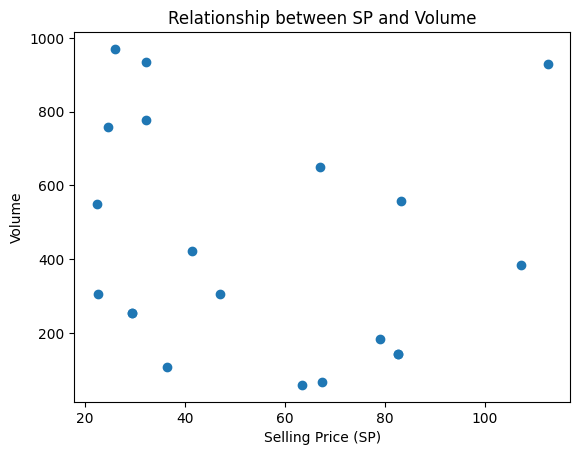

Correlation coefficient: -0.14990958781389202


In [70]:
# Is there any relation between SP and volume?

import matplotlib.pyplot as plt

# Assuming 'volume' is in a column named 'volume' in your DataFrame
plt.scatter(final_merged_data['SP'], final_merged_data['Volume'])
plt.xlabel('Selling Price (SP)')
plt.ylabel('Volume')
plt.title('Relationship between SP and Volume')
plt.show()

# Calculate correlation coefficient
correlation = final_merged_data['SP'].corr(final_merged_data['Volume'])
print("Correlation coefficient:", correlation)


In [75]:
# name the customer which has the highest number of orders

customer_orders = data1.groupby('Customer name')['Customer name'].count()
customer_with_most_orders = customer_orders.idxmax()
print("Customer with the most orders:", customer_with_most_orders)


Customer with the most orders: Zoey Carter


In [77]:
#  Calculate the overall gross margin %

overall_revenue = (final_merged_data['SP'] * final_merged_data['Volume']).sum()
overall_cost = (final_merged_data['BP'] * final_merged_data['Volume']).sum()

overall_gross_margin = (overall_revenue - overall_cost) / overall_revenue * 100
print("Overall Gross Margin %:", overall_gross_margin)


Overall Gross Margin %: 23.06115977668746
